<a href="https://colab.research.google.com/github/SheikhAmmar2004/KitTask/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
Project=pd.read_csv('/content/number-of-pakistani-emigrants-profession-wise-1981-2023.csv')

In [ ]:
Project

,Accountant,1981,603
0,Accountant,1982,542
1,Accountant,1983,473
2,Accountant,1984,368
3,Accountant,1985,324
4,Accountant,1986,228
...,...,...,...
1757,Welder,2019,5634
1758,Welder,2020,1250
1759,Welder,2021,2909
1760,Welder,2022,3782


In [ ]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Accountant  1762 non-null   object
 1   1981        1762 non-null   int64 
 2   603         1762 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.4+ KB


In [ ]:
Project = Project.rename(columns={"Accountant": "Profession", "1981": "Year","603":"Number of Emigrants"})


In [ ]:
Project

,Profession,Year,Number of Emigrants
0,Accountant,1982,542
1,Accountant,1983,473
2,Accountant,1984,368
3,Accountant,1985,324
4,Accountant,1986,228
...,...,...,...
1757,Welder,2019,5634
1758,Welder,2020,1250
1759,Welder,2021,2909
1760,Welder,2022,3782


In [ ]:
Project.isnull().sum()

Profession             0
Year                   0
Number of Emigrants    0
dtype: int64

In [ ]:
Project

,Profession,Year,Number of Emigrants
0,Accountant,1982,542
1,Accountant,1983,473
2,Accountant,1984,368
3,Accountant,1985,324
4,Accountant,1986,228
...,...,...,...
1757,Welder,2019,5634
1758,Welder,2020,1250
1759,Welder,2021,2909
1760,Welder,2022,3782


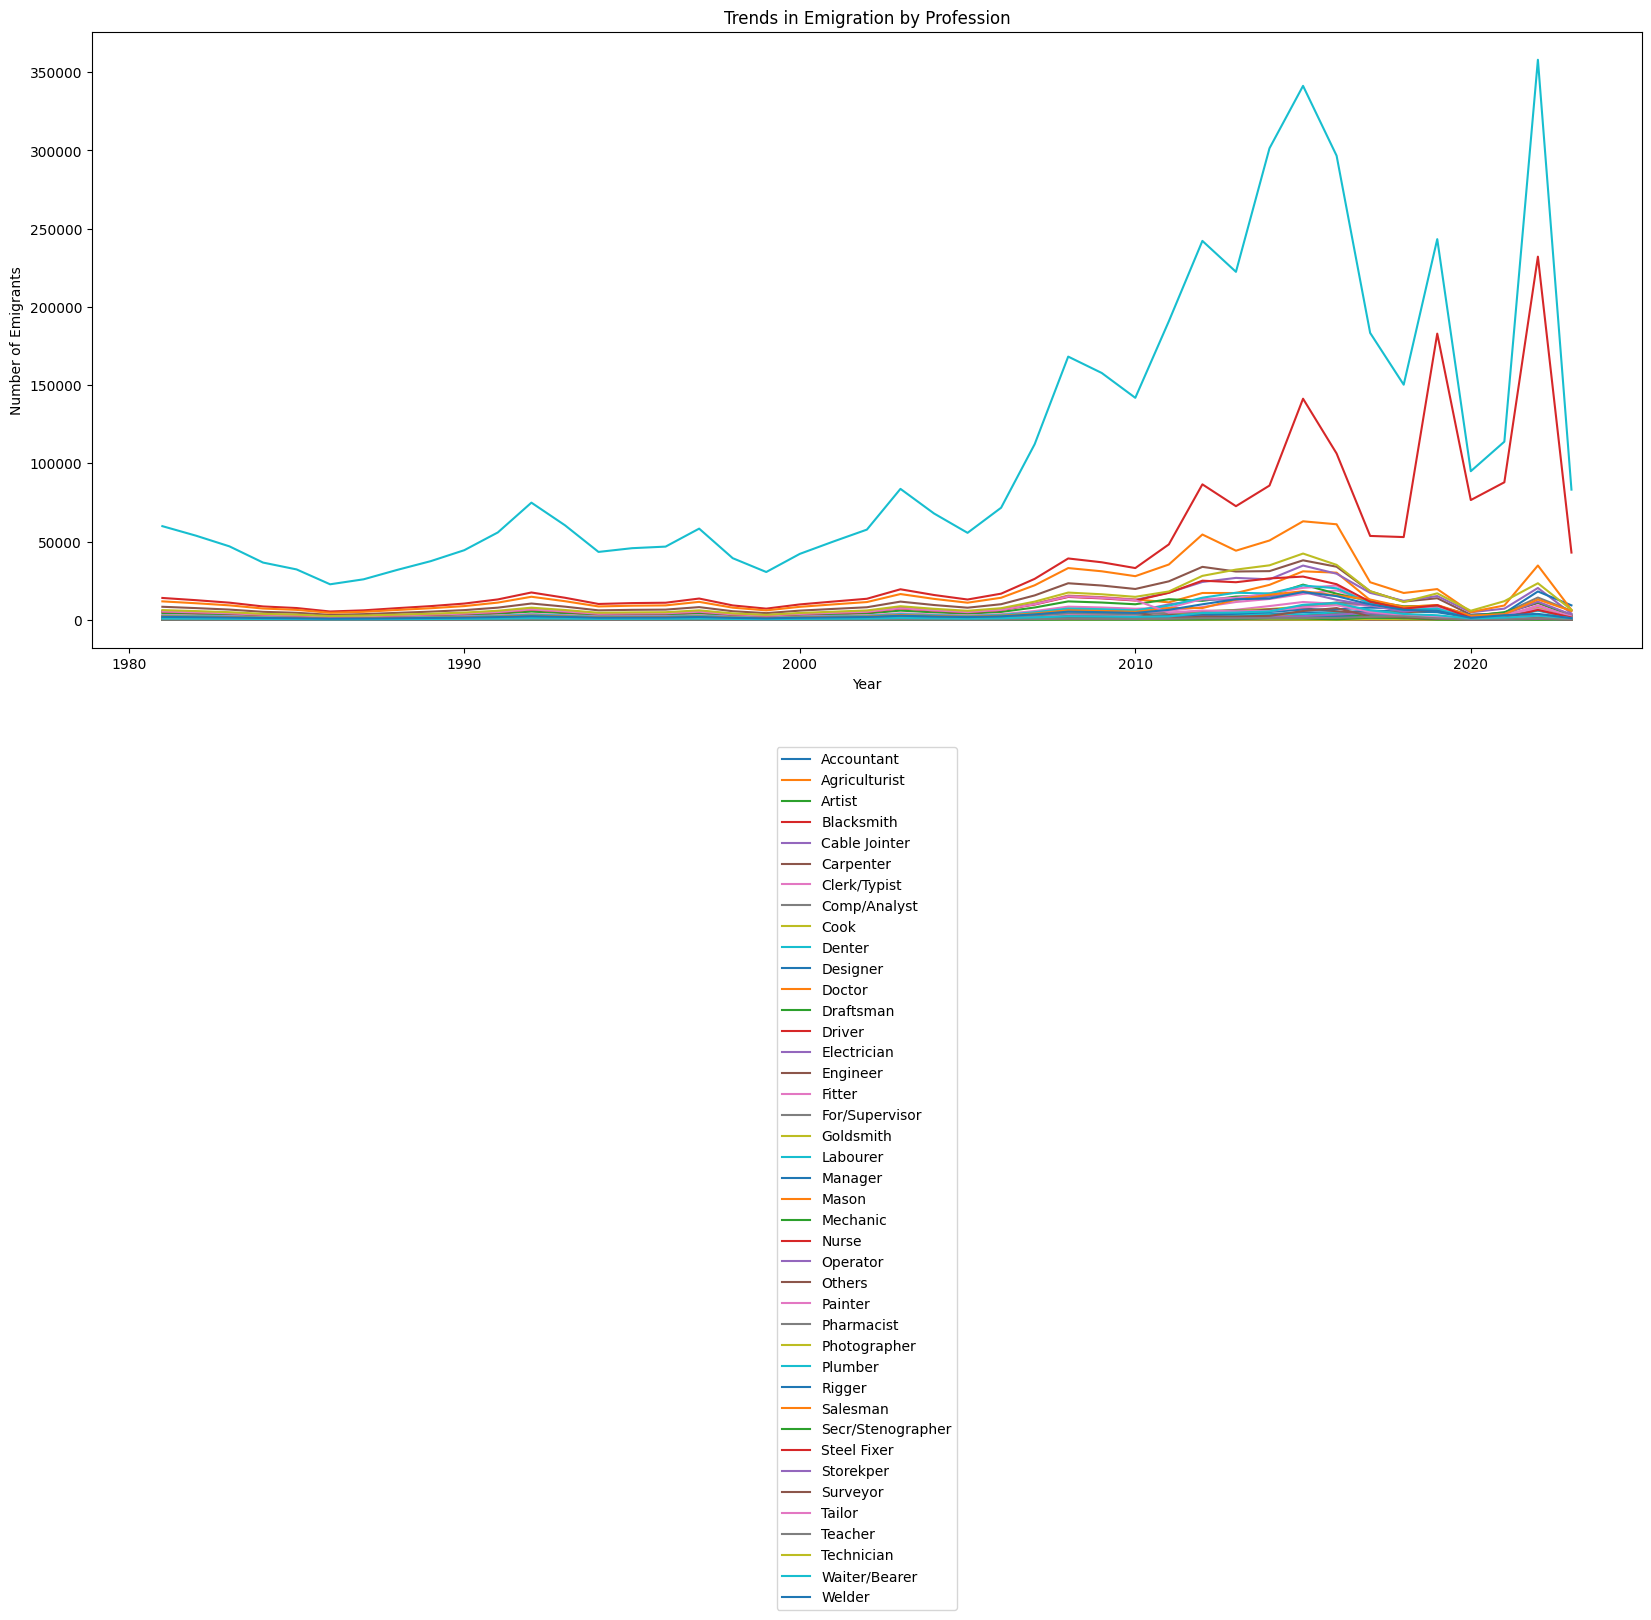

In [ ]:
plt.figure(figsize=(20, 8))
for profession in Project['Profession'].unique():
    Project_prof = Project[Project['Profession'] == profession]
    plt.plot(Project_prof['Year'], Project_prof['Number of Emigrants'], label=profession)

plt.title('Trends in Emigration by Profession')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.show()

ARIMA

Enter the Profession: Engineer


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

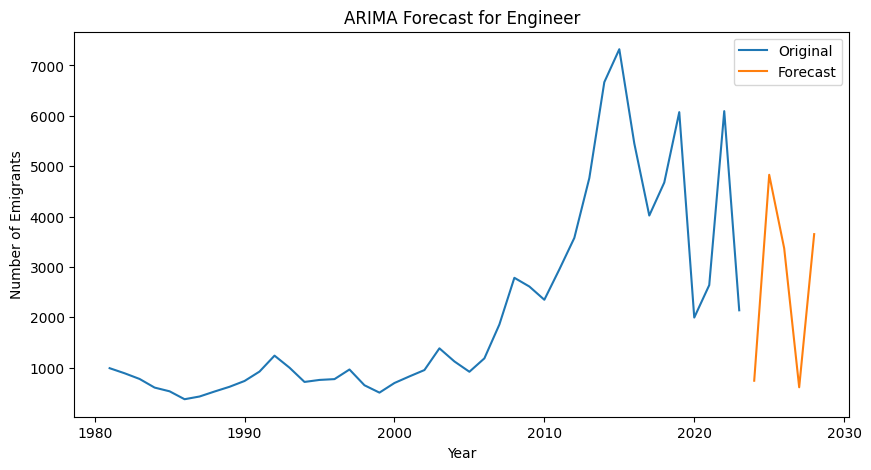

In [ ]:
profession = input('Enter the Profession: ')
Project_prof = Project[Project['Profession'] == profession].set_index('Year')

model_arima = ARIMA(Project_prof['Number of Emigrants'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

forecast_steps = 5
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

last_year = Project_prof.index[-1]
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]

plt.figure(figsize=(10, 5))
plt.plot(Project_prof.index, Project_prof['Number of Emigrants'], label='Original')
plt.plot(forecast_years, forecast_arima, label='Forecast')
plt.title(f'ARIMA Forecast for {profession}')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.legend()
plt.show()


In [ ]:
rmse_arima = mean_squared_error(Project_prof['Number of Emigrants'][-5:], forecast_arima, squared=False)
mae_arima = mean_absolute_error(Project_prof['Number of Emigrants'][-5:], forecast_arima)

print('ARIMA RMSE:', rmse_arima)
print('ARIMA MAE:', mae_arima)



ARIMA RMSE: 3723.079355571136
ARIMA MAE: 3177.451543456068


EXPONENTIAL SMOOTHING

Enter the Profession: Denter


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


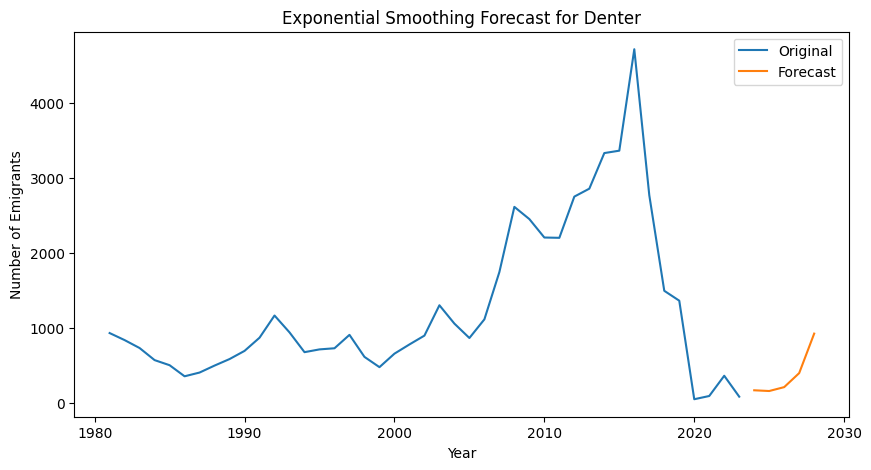

In [ ]:
profession = input('Enter the Profession: ')
Project_prof = Project[Project['Profession'] == profession].set_index('Year')

model_es = ExponentialSmoothing(Project_prof['Number of Emigrants'], trend='add', seasonal='add', seasonal_periods=12)
model_es_fit = model_es.fit()

forecast_steps = 5
forecast_es = model_es_fit.forecast(steps=forecast_steps)

last_year = Project_prof.index[-1]
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]

plt.figure(figsize=(10, 5))
plt.plot(Project_prof.index, Project_prof['Number of Emigrants'], label='Original')
plt.plot(forecast_years, forecast_es, label='Forecast')
plt.title(f'Exponential Smoothing Forecast for {profession}')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.legend()
plt.show()


REGRESSION ANALYSIS: LINEAR REGRESSION

Linear Regression RMSE: 13015.778584197502
Linear Regression MAE: 5672.845323068461


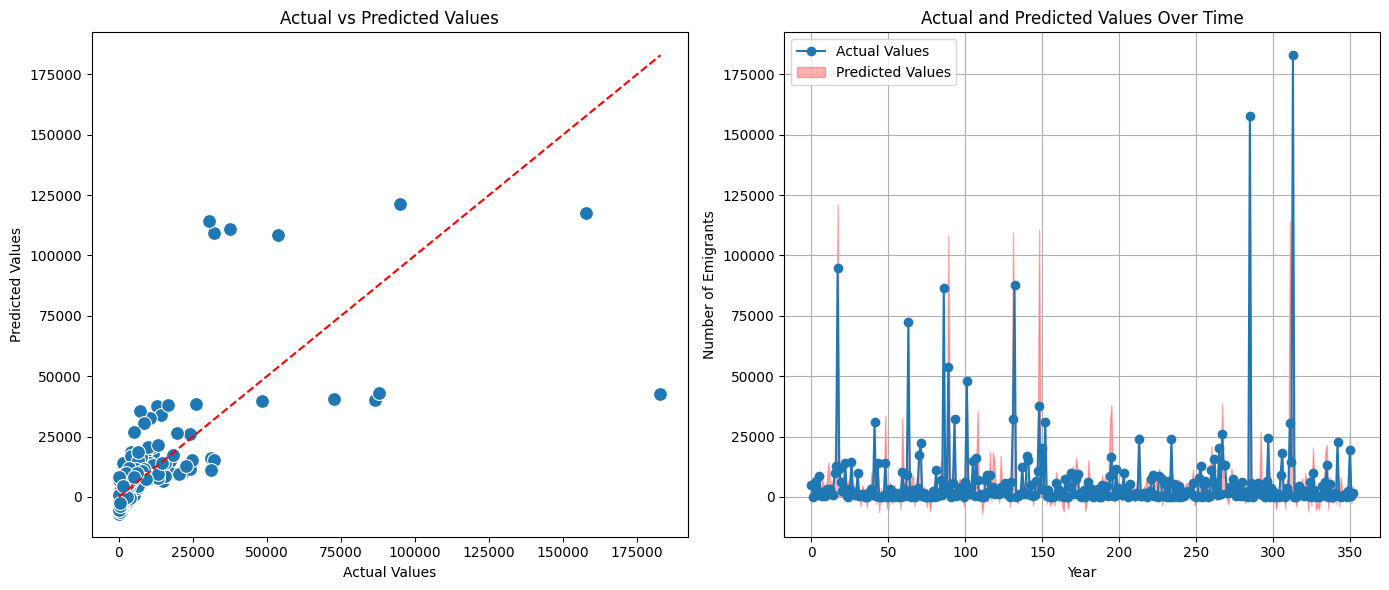

In [ ]:
X = Project[['Year', 'Profession']]
y = Project['Number of Emigrants']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

rmse = mean_squared_error(y_test, lr_predictions, squared=False)
mae = mean_absolute_error(y_test, lr_predictions)
print('Linear Regression RMSE:', rmse)
print('Linear Regression MAE:', mae)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_predictions, edgecolor='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.subplot(1, 2, 2)
plt.plot(y_test.reset_index(drop=True), label='Actual Values', linestyle='-', marker='o')
plt.fill_between(y_test.reset_index(drop=True).index, lr_predictions, alpha=0.3, label='Predicted Values', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.title('Actual and Predicted Values Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


REGRESSION ANALYSIS: RANDOM FOREST

Random Forest RMSE: 9397.153995978946
Random Forest MAE: 1995.991076487252


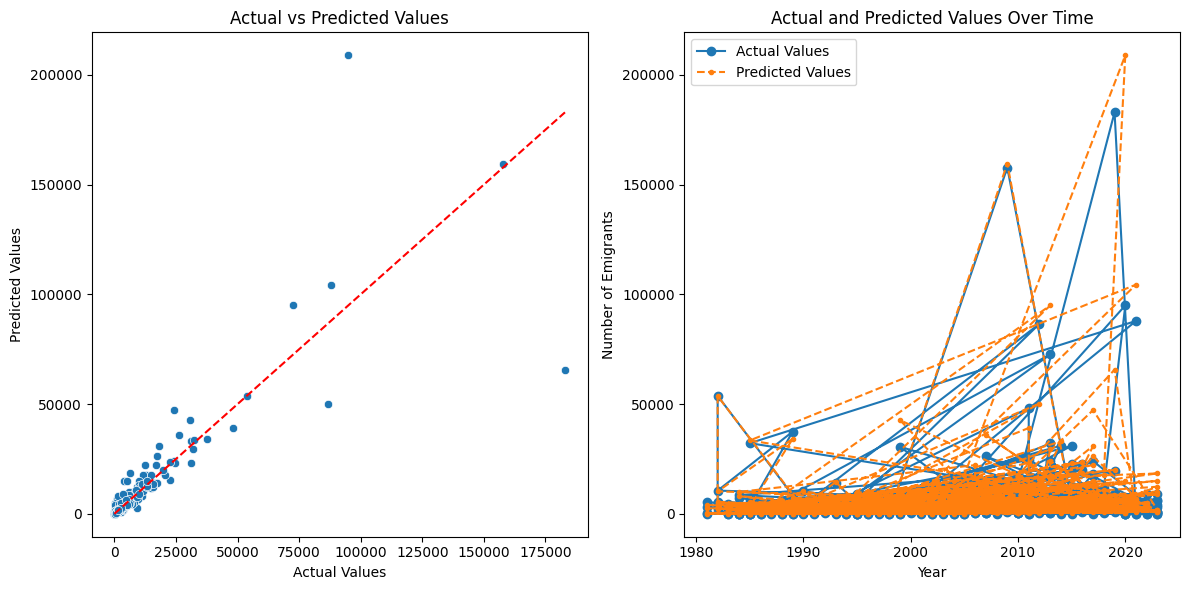

In [ ]:
X = Project[['Year', 'Profession']]
y = Project['Number of Emigrants']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rmse = mean_squared_error(y_test, rf_predictions, squared=False)
mae = mean_absolute_error(y_test, rf_predictions)
print('Random Forest RMSE:', rmse)
print('Random Forest MAE:', mae)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=rf_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.subplot(1, 2, 2)
years = X_test['Year']
plt.plot(years, y_test, label='Actual Values', linestyle='-', marker='o')
plt.plot(years, rf_predictions, label='Predicted Values', linestyle='--', marker='.')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.title('Actual and Predicted Values Over Time')
plt.legend()

plt.tight_layout()
plt.show()

CLASSIFICATION AND ANOMALY DETECTION: LOGISTIC REGRESSION

Logistic Regression Accuracy: 0.8895184135977338


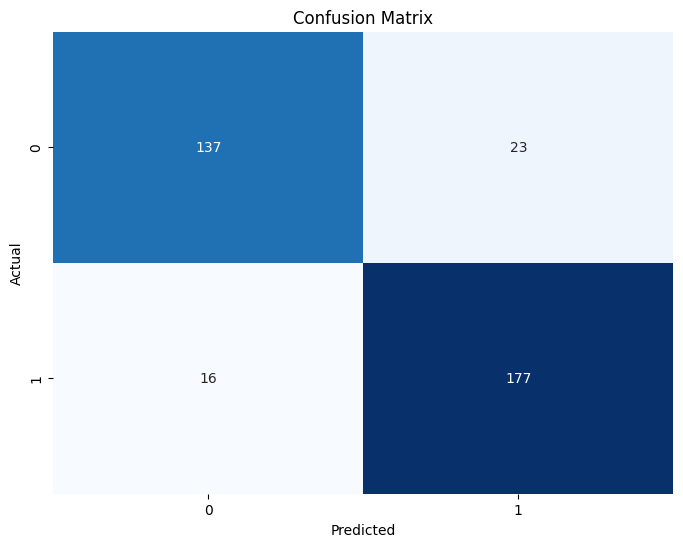

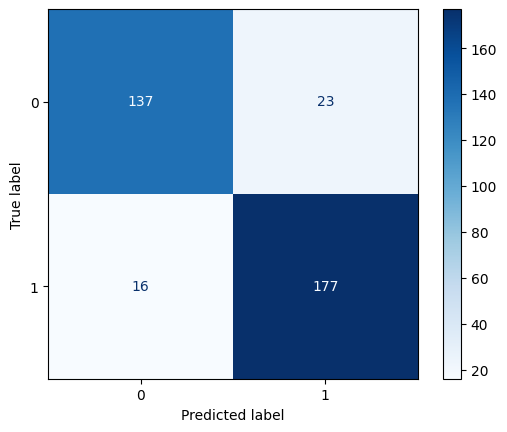

In [ ]:
Project['High_Emigration'] = (Project['Number of Emigrants'] > Project['Number of Emigrants'].median()).astype(int)

X_class = Project[['Year', 'Profession']]
y_class = Project['High_Emigration']

X_class = pd.get_dummies(X_class, drop_first=True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_class, y_train_class)
logreg_predictions = logreg_model.predict(X_test_class)

accuracy = accuracy_score(y_test_class, logreg_predictions)
print('Logistic Regression Accuracy:', accuracy)

conf_matrix = confusion_matrix(y_test_class, logreg_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_model.classes_)
disp.plot(cmap='Blues')
plt.show()


ISOLATION FOREST

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


         Profession  Year  Number of Emigrants  High_Emigration  Anomaly
170      Blacksmith  2023                  759                0       -1
257    Clerk/Typist  1981                 1930                1       -1
258    Clerk/Typist  1982                 1734                1       -1
259    Clerk/Typist  1983                 1514                1       -1
260    Clerk/Typist  1984                 1179                0       -1
...             ...   ...                  ...              ...      ...
1714  Waiter/Bearer  2019                 2882                1       -1
1715  Waiter/Bearer  2020                  851                0       -1
1716  Waiter/Bearer  2021                 1384                1       -1
1717  Waiter/Bearer  2022                 2600                1       -1
1718  Waiter/Bearer  2023                 1010                0       -1

[177 rows x 5 columns]


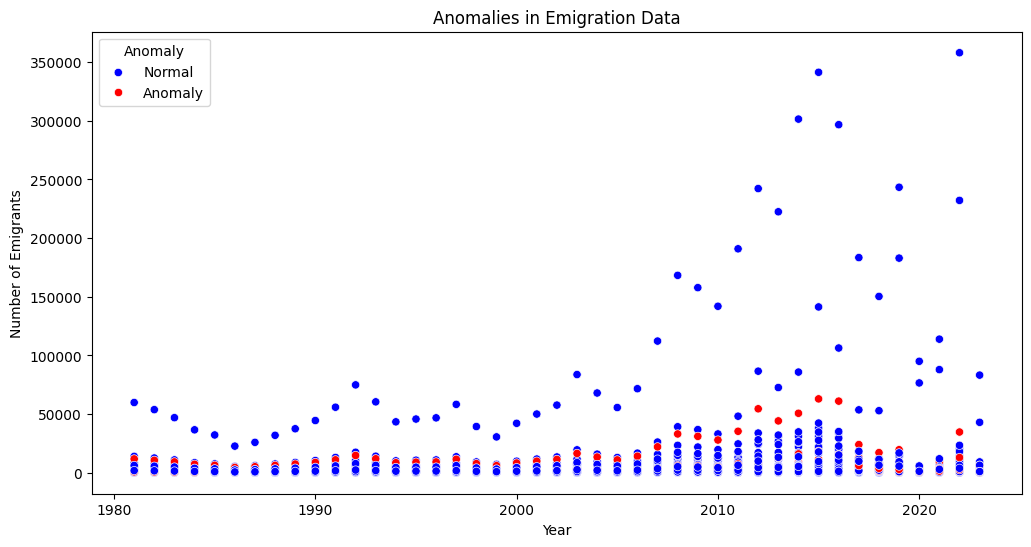

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
Project['Anomaly'] = iso_forest.fit_predict(X)

anomalies = Project[Project['Anomaly'] == -1]
print(anomalies)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=Project, x='Year', y='Number of Emigrants', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomalies in Emigration Data')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.legend(title='Anomaly', loc='upper left', labels=['Normal', 'Anomaly'])
plt.show()


INSIGHTS

In [ ]:
print('Insight 1: The overall trend shows changes in emigration over the years.')
print('Insight 2: Factors influencing emigration include economic conditions and job opportunities abroad.')
print('Insight 3: Anomalies detected indicate unusual changes in emigration numbers.')
print('Recommendations: Policymakers should consider addressing factors driving emigration to manage workforce distribution effectively.')


Insight 1: The overall trend shows changes in emigration over the years.
Insight 2: Factors influencing emigration include economic conditions and job opportunities abroad.
Insight 3: Anomalies detected indicate unusual changes in emigration numbers.
Recommendations: Policymakers should consider addressing factors driving emigration to manage workforce distribution effectively.


<ipython-input-18-702e958ad186>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_professions.values, y=top_20_professions.index, palette='viridis')


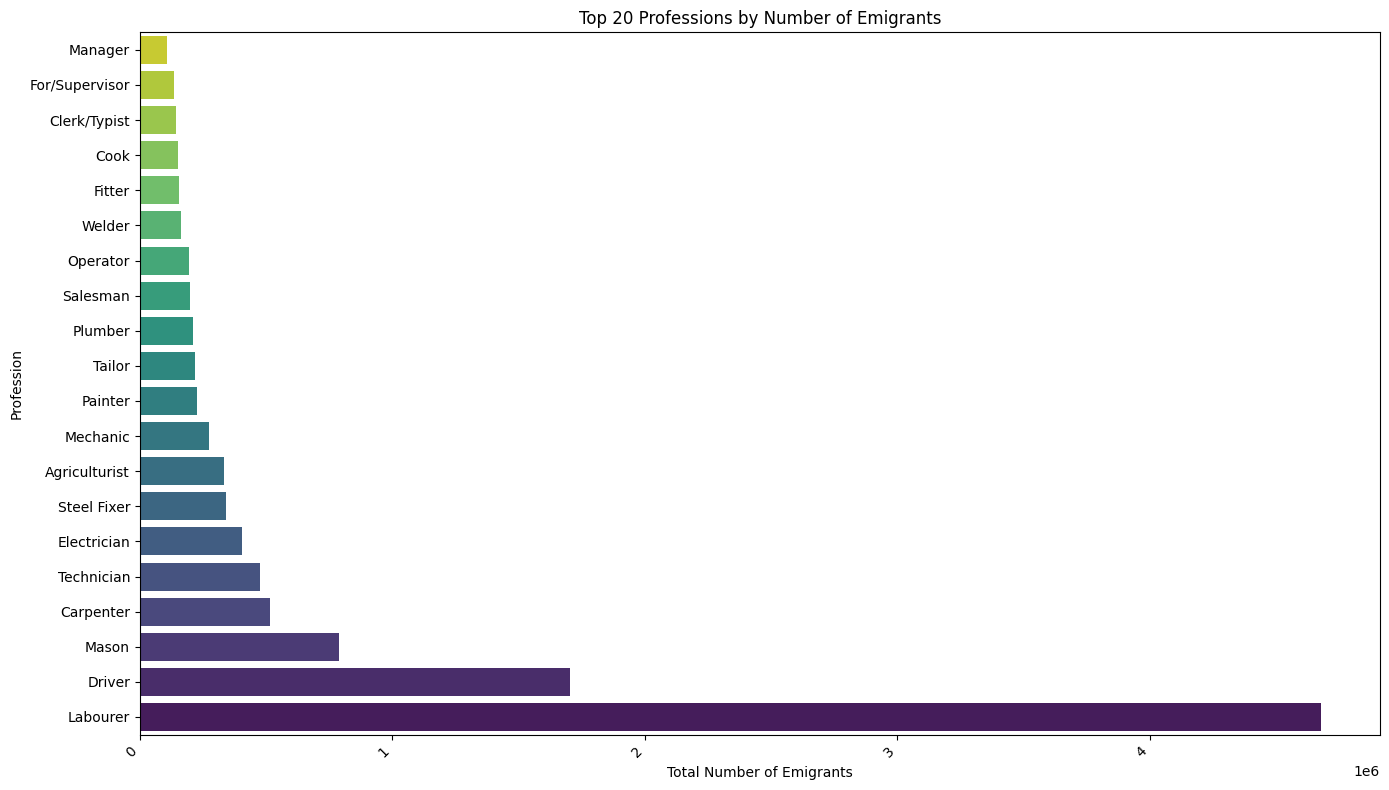

In [ ]:
profession_totals = Project.groupby('Profession')['Number of Emigrants'].sum().sort_values(ascending=False)

# Select the top 20 professions
top_20_professions = profession_totals.head(20)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_professions.values, y=top_20_professions.index, palette='viridis')
plt.title('Top 20 Professions by Number of Emigrants')
plt.xlabel('Total Number of Emigrants')
plt.ylabel('Profession')

# Customize the x-axis ticks and labels
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profession at the top
plt.tight_layout()

plt.show()